Zadanie 8. Oszukiwanie CNN
1. Weź zdjęcie ze zbioru walidacyjnego CIFAR10.
2. Dodaj do zdjęcia szum (np. szum gaussowski).
3. Wykorzystaj sieć wyuczoną w którymś z poprzednich kroków (lub wyucz sieć od nowa) i sprawdź, jak sobie radzi ze zdjęciem z szumem - zwraca tę samą klasę czy inną?
4. Sprawdź, jak na sieć zadziała słabszy/mocniejszy szum.
5. *Dodaj szum do wszystkich zdjęć w zbiorze walidacyjnym i sprawdź różnicę w accuracy.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Wczytanie danych CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizacja danych wejściowych
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Przygotowanie funkcji do dodawania szumu gaussowskiego do obrazu
def add_gaussian_noise(image, mean, stddev):
    noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

In [4]:
# Definicja modelu CNN z Batch Normalization i Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
# Kompilacja modelu
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Trening modelu
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 27s 8ms/step - loss: 1.4391 - accuracy: 0.5112 - val_loss: 1.0950 - val_accuracy: 0.6196
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9885 - accuracy: 0.6550 - val_loss: 0.9323 - val_accuracy: 0.6843
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8805 - accuracy: 0.6918 - val_loss: 0.8278 - val_accuracy: 0.7171
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7783 - accuracy: 0.7292 - val_loss: 1.2227 - val_accuracy: 0.6106
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7099 - accuracy: 0.7526 - val_loss: 0.6548 - val_accuracy: 0.7714
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6662 - accuracy: 0.7685 - val_loss: 0.6468 - val_accuracy: 0.7789
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6113 - accuracy: 0.7870 - val_loss: 0.9289 - val_

In [7]:
# Zapisanie wytrenowanego modelu
model.save('trained_model.h5')

In [9]:
# Wczytanie danych CIFAR-10
(_, _), (x_val, y_val) = cifar10.load_data()

# Wybór jednego zdjęcia z zestawu walidacyjnego
image = x_val[0]
label = y_val[0]

In [10]:
# Dodanie szumu gaussowskiego do zdjęcia
noisy_image = add_gaussian_noise(image, mean=0, stddev=30)

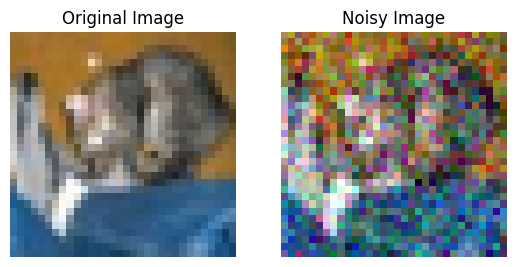

In [11]:
# Wyświetlenie obrazów przed i po dodaniu szumu
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.axis('off')

plt.show()

In [12]:
# Normalizacja danych wejściowych
noisy_image = noisy_image / 255.0

In [13]:
# Wczytanie wytrenowanego modelu CNN
model = load_model('trained_model.h5')

In [14]:
# Przewidywanie klasy dla obrazu z szumem
prediction = model.predict(np.expand_dims(noisy_image, axis=0))
predicted_class = np.argmax(prediction)

# Wyświetlenie wyników
print("Przewidywana klasa dla obrazu z szumem:", predicted_class)
print("Prawdziwa klasa obrazu:", label)

1/1 [==============================] - 1s 835ms/step
Przewidywana klasa dla obrazu z szumem: 3
Prawdziwa klasa obrazu: [3]
